In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from collections import defaultdict
import seaborn as sns

In [14]:
DATASET = 'Ovules'
DATASET_PATH = os.path.join('/scratch/ottosson/datasets', DATASET)
RAW_PATH = os.path.join(DATASET_PATH, 'raw')
LABEL_PATH = os.path.join(DATASET_PATH, 'label')
BACKGROUND_LABEL = 1
DATA_FRAME_PATH = os.path.join(DATASET_PATH, 'dataframes')

In [15]:
cell_df = pd.read_csv(os.path.join(DATA_FRAME_PATH, 'cell_df.csv'))
label_df = pd.read_csv(os.path.join(DATA_FRAME_PATH, 'label_df.csv'))
sample_df = pd.read_csv(os.path.join(DATA_FRAME_PATH, 'sample_df.csv'))

In [16]:
sample_df['p'] = sample_df['background_volume']/(sample_df['X']*sample_df['Y']*sample_df['Z'])

In [18]:
sample_df.describe()

,Z,Y,X,label_min,label_max,num_cells,background_volume,cell_radius,cell_volume,raw_min,raw_max,raw_mean,raw_std,p
count,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.0,24.0,24.000000,24.000000,24.000000
mean,322.458333,933.458333,943.500000,1.0,1390.458333,1114.041667,2.460740e+08,32.757701,42515.582207,0.0,255.0,16.324300,37.640786,0.830612
std,63.324546,191.471641,282.910648,0.0,820.207184,469.726607,1.299134e+08,2.312811,10314.580801,0.0,0.0,10.950630,19.495722,0.059126
min,244.000000,563.000000,391.000000,1.0,458.000000,447.000000,7.053100e+07,27.884836,24812.600000,0.0,255.0,3.213634,11.367238,0.713601
25%,274.000000,860.000000,869.250000,1.0,641.250000,612.750000,1.635907e+08,31.731219,35729.615599,0.0,255.0,7.181614,19.689658,0.786518
50%,317.000000,930.000000,950.000000,1.0,1457.000000,1253.500000,2.402302e+08,32.644851,41693.348448,0.0,255.0,11.242611,32.277658,0.843057
75%,350.250000,1024.500000,1033.000000,1.0,1700.750000,1415.750000,2.920460e+08,34.627403,50742.284241,0.0,255.0,25.328207,58.488689,0.876764
max,526.000000,1336.000000,1480.000000,1.0,3947.000000,1810.000000,6.015380e+08,36.288034,58736.022682,0.0,255.0,39.494580,72.557286,0.932699


In [31]:
sample_df['im_volume'] = sample_df['Z']*sample_df['Y']*sample_df['X']

In [32]:
sample_df['part_background'] = sample_df['background_volume']/sample_df['im_volume']

In [16]:
cell_df.groupby('sample_name').median()

,id,cell_volume,cell_radius
sample_name,,,
0h,224.5,15118.5,24.726891
120h,474.0,14627.0,24.455981
132h,727.0,36509.0,33.174163
24h,339.0,15510.0,24.938516
26h,490.5,26522.5,29.822090
32h,259.0,19292.0,26.820019
44h,836.5,34657.0,32.603453
56h,1006.0,30069.0,31.096129
69h,1670.0,29412.0,30.867978


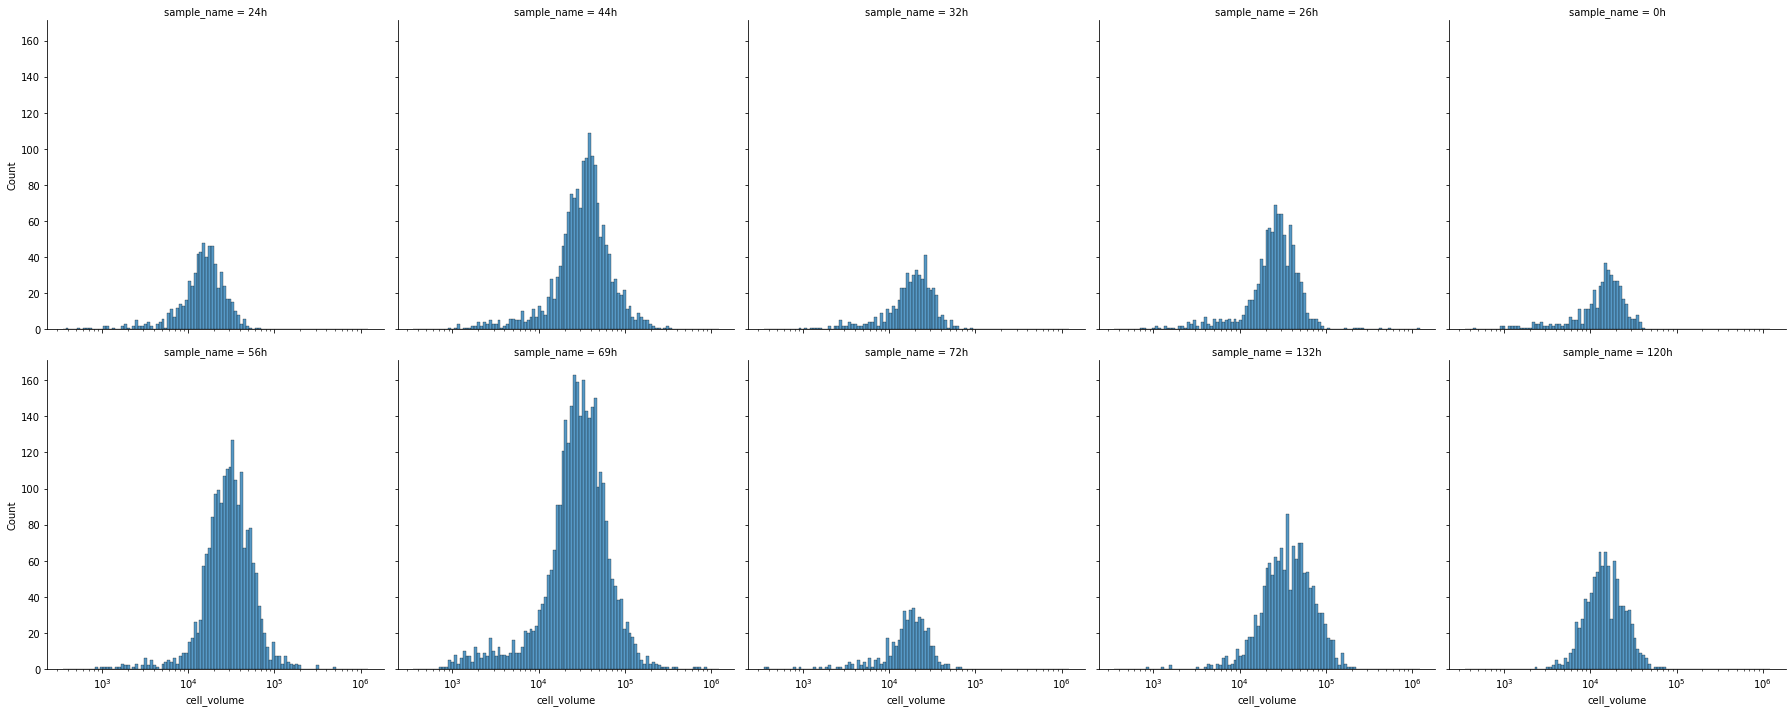

In [20]:
sns.displot(data = cell_df, x = 'cell_volume', col = 'sample_name', col_wrap=5, log_scale=True)

In [22]:
cell_df[cell_df['sample_name'] == '0h'].describe()

,id,cell_volume,cell_radius
count,446.000000,446.000000,446.000000
mean,224.500000,15375.396861,23.905488
std,128.893367,8026.502194,5.032908
min,2.000000,449.000000,7.657414
25%,113.250000,10314.750000,21.768052
50%,224.500000,15118.500000,24.726891
75%,335.750000,20097.000000,27.187980
max,447.000000,41781.000000,34.699744
